#INTRODUCTION TO DATA SCIENCE
#Group 14 -- Project phase 2

## Bidirection Feature Elimination

|Name| Student ID|
|:---|:-----------:|
|Pham, Quoc Huy| 2299356|
|Hussain, Zakiuddin| 2338350|
|Lee, Daeul Haven| 2308018|
|Preetham| 2288949|
|Jayanth| 2288552|
|Srikavya| 2311351|

### 1. Import library and read the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
data = pd.read_csv('Group_14_Clean_Data.csv')

In [ ]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

From question 1 and 3 we have our RandomForest as the best classifier. The result is shown as below:

Best Hyperparameters:
* 'max_depth': 20
* 'min_samples_leaf': 1
* 'min_samples_split': 2
* 'n_estimators': 50

In [ ]:
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
rf = RandomForestClassifier(oob_score=True, random_state=42, **best_params)

|          |precision  |  recall | f1-score  | support|
|-----------|----------|----------|----------|--------|
|          0  |     1.00 |  1.00   |   1.00 |     4480|
|          1  |    1.00  |  1.00   |   1.00 |     4437|
|  accuracy   |          |         |   1.00 |     8917|
| macro avg   |    1.00  |    1.00 |   1.00 |     8917|
| weighted avg|    1.00  |    1.00 |   1.00 |     8917|

### 2. Perform prediction with original data

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, oob_score=True,
                       random_state=42)

Random Forest Classifier with original data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6026
           1       1.00      1.00      1.00      5863

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



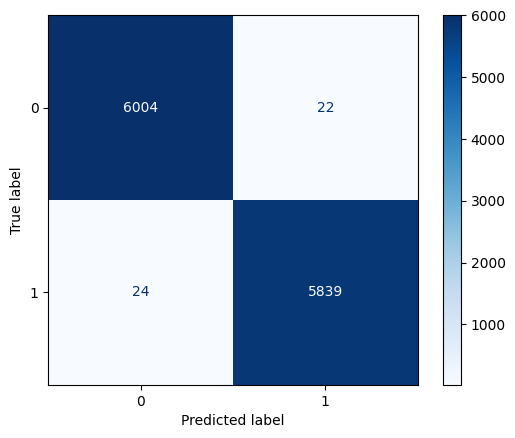

In [ ]:
y_pred_forest = rf.predict(X_test)

print("Random Forest Classifier with original data:")
print(classification_report(y_test, y_pred_forest))
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=rf.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()

### 3. Perform Bidirectional Features Elimination

In [ ]:
num_features_to_select = 7

num_features = len(X_train.columns.tolist())
looped_X_train = X_train.copy()

while num_features> num_features_to_select:
  n1 = num_features-1
  n2 = num_features-2
  sfe = SequentialFeatureSelector(estimator=rf, n_features_to_select=n1, direction = 'forward', n_jobs = -1)
  sbe = SequentialFeatureSelector(estimator=rf, n_features_to_select=n2, direction = 'backward', n_jobs= -1)
  #Eliminating Features with Forward pass
  sfe.fit(looped_X_train, y_train)
  sfe_features = looped_X_train.columns[sfe.support_].tolist()
  looped_X_train = looped_X_train[sfe_features]
  #Eliminating Features with Backward pass
  sbe.fit(looped_X_train, y_train)
  sbe_features = looped_X_train.columns[sbe.support_].tolist()
  looped_X_train = looped_X_train[sbe_features]

  num_features = len(looped_X_train.columns.tolist())

selected_features = looped_X_train.columns
print(f"List of selected features:\n {', '.join(selected_features)}")




List of selected features:
 TP2, H1, DV_pressure, Reservoirs, Oil_temperature, DV_eletric, LPS


### 4. Perform prediction with new set of parameter

In [ ]:
#Fit Random Forest model with selected features
rf.fit(looped_X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, oob_score=True,
                       random_state=42)

In [ ]:
selected_features = looped_X_train.columns

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6026
           1       1.00      1.00      1.00      5863

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



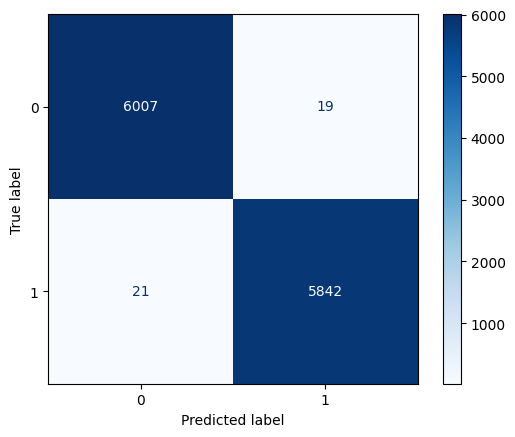

In [ ]:
#EValuate the result of new features
y_pred_forest = rf.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred_forest)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=rf.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()

### 5. Conclusion

From the classification report, we observed that the number of false negatives and false positives has decreased:

* Class 0: 22–>19

* Class 1: 24->21

This shows that the bi-directional feature elimination has not only reduced the dimension of our feature space but also increased the model's performance and accuracy. This suggests that certain features were not contributing significantly to the classification task, leading to more efficient and accurate predictions.

